In [1]:
# import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as sk_preprocessing
import sklearn.model_selection as sk_modelselect
import tensorflow as tf

In [2]:
# load dataset
dataset = pd.DataFrame(pd.read_csv("../data/dataset_1.csv", header=0))
display(dataset.head(10))

print(dataset.shape)

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.410
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.690
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.860
3,26.3,3,-,10.318,8540,53.6,136.0,130,7990,4170.780
4,26.4,2,-,10.316,9560,53.7,136.0,130,8915,4653.630
5,26.5,3,-,10.315,9490,53.8,140.0,130,8880,4635.360
6,26.6,3,1,10.313,9780,54.0,140.0,130,9180,4791.960
7,27.0,2,2,10.317,10450,54.1,140.0,130,9826,6317.135
8,27.1,2,2,10.329,10800,54.3,144.0,130,10110,6499.719
9,27.2,5,2,10.342,10860,54.5,144.0,130,10170,6538.293


(302, 10)


In [3]:
# check for missing data
print(dataset.isna().sum())

Age                   0
Mortality female      0
Mortality male        0
sex ratio             0
Total Eggs            0
Egg Weight            0
Feed female           0
Feed male             0
Hatching Eggs         0
total hatched eggs    0
dtype: int64


In [4]:
# Get columns with object or categorical dtype
categorical_cols = dataset.columns[(dataset.dtypes==object) | (dataset.dtypes==bool)].tolist()

print(categorical_cols)

['Mortality female', 'Mortality male']


In [5]:
# Loop through each categorical column and print what are the categoris they have (only done for test dataset)
for col in categorical_cols:
    categories = dataset[col].unique()
    print(f"{col}: {categories}")

Mortality female: ['5' '2' '3' '4' '6' '58' '67' '32' '8' '11' '17' '12' '10' '.' '7']
Mortality male: ['2' '1' '-' '75' '3' '4' '0']


In [6]:
dataset.replace('-', 0, inplace=True)
dataset.replace('.', 0, inplace=True)
display(dataset.head())

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.41
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.69
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.86
3,26.3,3,0,10.318,8540,53.6,136.0,130,7990,4170.78
4,26.4,2,0,10.316,9560,53.7,136.0,130,8915,4653.63


In [12]:
dataset['Mortality male'] = dataset['Mortality male'].astype(int)
dataset['Mortality female'] = dataset['Mortality female'].astype(int)

dataset.dtypes

Age                   float64
Mortality female        int32
Mortality male          int32
sex ratio             float64
Total Eggs              int64
Egg Weight            float64
Feed female           float64
Feed male               int64
Hatching Eggs           int64
total hatched eggs    float64
dtype: object

In [16]:
x_data = dataset.drop(['total hatched eggs', 'Hatching Eggs', 'Feed male'], axis=1)
y_data = dataset['total hatched eggs']

# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = sk_modelselect.train_test_split(x_data, y_data, test_size=0.20, random_state=42)

display(X_train.head());
display(y_train.head());

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female
132,44.6,4,0,10.878,11150,65.8,160.0
202,54.6,4,0,11.028,9450,67.8,158.0
196,54.0,2,0,11.025,9750,67.7,158.0
75,36.5,8,1,10.514,12340,62.2,166.0
176,51.1,2,2,10.921,10000,67.2,158.0


132     9361.35
202     7493.80
196     7830.60
75     10285.80
176     8113.00
Name: total hatched eggs, dtype: float64

In [17]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],) ))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

In [18]:
hist = model.fit(X_train, y_train,batch_size=50, epochs=600, verbose=1)

Epoch 1/600
5/5 [==============================] - 1s 8ms/step - loss: 5324.3115
Epoch 2/600
5/5 [==============================] - 0s 4ms/step - loss: 5091.6929
Epoch 3/600
5/5 [==============================] - 0s 5ms/step - loss: 4870.7700
Epoch 4/600
5/5 [==============================] - 0s 5ms/step - loss: 4652.4453
Epoch 5/600
5/5 [==============================] - 0s 2ms/step - loss: 4421.0508
Epoch 6/600
5/5 [==============================] - 0s 3ms/step - loss: 4177.7256
Epoch 7/600
5/5 [==============================] - 0s 4ms/step - loss: 3925.0122
Epoch 8/600
5/5 [==============================] - 0s 3ms/step - loss: 3659.0471
Epoch 9/600
5/5 [==============================] - 0s 4ms/step - loss: 3384.8733
Epoch 10/600
5/5 [==============================] - 0s 4ms/step - loss: 3104.1775
Epoch 11/600
5/5 [==============================] - 0s 4ms/step - loss: 2807.2913
Epoch 12/600
5/5 [==============================] - 0s 4ms/step - loss: 2510.3264
Epoch 13/600
5/5 [=======

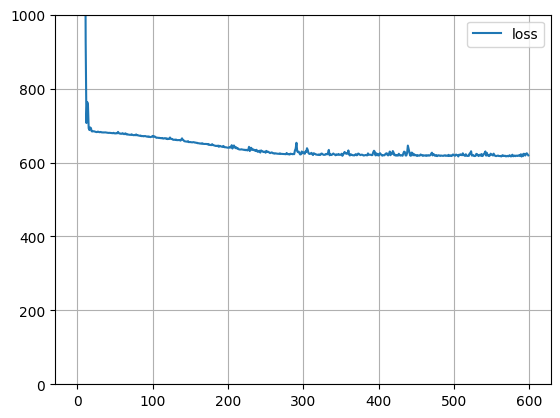

In [11]:
import matplotlib.pyplot as plt

# https://www.tensorflow.org/tutorials/keras/regression
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.legend()
  plt.grid(True)

plot_loss(hist)

In [21]:
predictions = model.predict(X_test)
print(predictions)

# # Step 5: Store predictions in a CSV file
# output_df = pd.DataFrame({'hatchedeggs': predictions})

# # Step 6: Save the CSV file
# # output_df.insert(0, 'actual', y_test)
# output_df.to_csv('predictions.csv', index=False)

# Create a DataFrame with predicted values and actual values
results_df = pd.DataFrame({'Predictions': predictions.flatten(), 'Actual': y_test})

# Save the DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)

2/2 [==============================] - 0s 0s/step
[[ 7996.88  ]
 [ 7115.5225]
 [ 9618.294 ]
 [ 6538.576 ]
 [10625.753 ]
 [ 8919.822 ]
 [ 9371.764 ]
 [ 7177.5947]
 [ 5587.915 ]
 [10952.488 ]
 [ 7755.11  ]
 [10280.468 ]
 [10821.313 ]
 [ 8038.902 ]
 [ 9335.489 ]
 [10962.118 ]
 [ 9207.296 ]
 [ 7150.2207]
 [ 5483.157 ]
 [ 5510.306 ]
 [ 8453.605 ]
 [ 5419.5312]
 [ 5628.9224]
 [10337.495 ]
 [ 8877.729 ]
 [ 5504.5454]
 [ 6028.7   ]
 [10369.503 ]
 [ 6736.216 ]
 [ 9131.384 ]
 [ 8495.767 ]
 [ 5410.717 ]
 [ 7730.0674]
 [10963.515 ]
 [10644.3125]
 [ 8478.704 ]
 [10238.097 ]
 [ 9645.681 ]
 [10146.123 ]
 [10833.1455]
 [ 9987.537 ]
 [10311.71  ]
 [ 8563.882 ]
 [ 9661.747 ]
 [ 8580.929 ]
 [ 6280.9087]
 [ 5379.9785]
 [10673.001 ]
 [ 5154.373 ]
 [ 6912.418 ]
 [ 7024.6064]
 [ 6077.34  ]
 [10355.282 ]
 [10127.138 ]
 [ 6562.179 ]
 [ 7615.7026]
 [ 6173.787 ]
 [ 9793.488 ]
 [ 4827.6167]
 [ 7883.5176]
 [ 7870.6377]]


In [22]:
model.save('model.h5')